:📌 #Extracción

In [ ]:
import pandas as pd
import numpy as np
#import matplotlib.pyplot as plt
#import seaborn as sns
#Ahora Cargaremos los Datos desde el archivo Plano
url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json'

datos_arch= pd.read_json(url)


#Normalización de Datos

In [ ]:
df_telco = pd.DataFrame(datos_arch)
df_telco.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [ ]:
df_telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [ ]:
#Ahora se normalizara las columnas Anidadas

customer = pd.json_normalize(datos_arch['customer'])
phone = pd.json_normalize(datos_arch['phone'])
internet = pd.json_normalize(datos_arch['internet'])
account = pd.json_normalize(datos_arch['account'])


In [ ]:
datos_arch = pd.concat([datos_arch, customer, phone, internet, account], axis=1)

datos_arch.head()

,customerID,Churn,customer,phone,internet,account,gender,SeniorCitizen,Partner,Dependents,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '...",Female,0,Yes,Yes,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,0,No,No,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,0,No,No,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,1,Yes,No,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Female,1,Yes,No,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [ ]:
datos = datos_arch.drop(['customer', 'phone', 'internet', 'account'], axis=1)
datos.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [ ]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


#🔧 Transformación
### Aqui se procederá a darle formato por tipo de dato a cada columna


In [ ]:
import numpy as np
datos['Charges.Total']=datos['Charges.Total'].str.replace(',', '.').str.replace(' ', '')


In [ ]:
#Elimina los espacios en blanco para formatear la columna con la separación con decimales

datos['Charges.Total'] = pd.to_numeric(
    datos['Charges.Total'].astype(str).str.strip().str.replace(',', '.'),
    errors='coerce'
)
datos['Charges.Total'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 7267 entries, 0 to 7266
Series name: Charges.Total
Non-Null Count  Dtype  
--------------  -----  
7256 non-null   float64
dtypes: float64(1)
memory usage: 56.9 KB


In [ ]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [ ]:
datos.nunique()

,0
customerID,7267
Churn,3
gender,2
SeniorCitizen,2
Partner,2
Dependents,2
tenure,73
PhoneService,2
MultipleLines,3
InternetService,3


In [ ]:
#Revisar las columnas que poseen mas datos, para normalizar la información
columna_rev = datos[['Churn','gender','SeniorCitizen','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaymentMethod']]

In [ ]:
#Ahora hago un muestreo de la información.
for col in columna_rev:
    print(f"\n--- {col} ---")
    print(datos[col].value_counts())


--- Churn ---
Churn
No     5174
Yes    1869
        224
Name: count, dtype: int64

--- gender ---
gender
Male      3675
Female    3592
Name: count, dtype: int64

--- SeniorCitizen ---
SeniorCitizen
0    6085
1    1182
Name: count, dtype: int64

--- MultipleLines ---
MultipleLines
No                  3495
Yes                 3065
No phone service     707
Name: count, dtype: int64

--- InternetService ---
InternetService
Fiber optic    3198
DSL            2488
No             1581
Name: count, dtype: int64

--- OnlineSecurity ---
OnlineSecurity
No                     3608
Yes                    2078
No internet service    1581
Name: count, dtype: int64

--- OnlineBackup ---
OnlineBackup
No                     3182
Yes                    2504
No internet service    1581
Name: count, dtype: int64

--- DeviceProtection ---
DeviceProtection
No                     3195
Yes                    2491
No internet service    1581
Name: count, dtype: int64

--- TechSupport ---
TechSupport
No        

In [ ]:
# Aqui se simplificará las categorias para analizarlas mejor
# Las categorias que utilizaremos seran las siguientes:

    # 0 ===> No
    # 1 ===> Yes
    # 2 ===> No phone service / No internet service


consolida_Info = {
    'Churn': {'Yes': 1, 'No': 0},
    'Partner': {'Yes': 1, 'No': 0},
    'Dependents': {'Yes': 1, 'No': 0},
    'PhoneService': {'Yes': 1, 'No': 0},
    'PaperlessBilling': {'Yes': 1, 'No': 0},
    'MultipleLines': {'Yes': 1, 'No': 0, 'No phone service': 2},
    'OnlineSecurity': {'Yes': 1, 'No': 0, 'No internet service': 2},
    'OnlineBackup': {'Yes': 1, 'No': 0, 'No internet service': 2},
    'DeviceProtection': {'Yes': 1, 'No': 0, 'No internet service': 2},
    'TechSupport': {'Yes': 1, 'No': 0, 'No internet service': 2},
    'StreamingTV': {'Yes': 1, 'No': 0, 'No internet service': 2},
    'StreamingMovies': {'Yes': 1, 'No': 0, 'No internet service': 2},
    'gender' : {'Female': 1, 'Male': 0},
    'SeniorCitizen': {0: 0, 1: 1}}

In [ ]:
datos.replace(consolida_Info, inplace=True)

/tmp/ipython-input-17-2612945120.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  datos.replace(consolida_Info, inplace=True)


In [ ]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   int64  
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   int64  
 5   Dependents        7267 non-null   int64  
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   int64  
 8   MultipleLines     7267 non-null   int64  
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   int64  
 11  OnlineBackup      7267 non-null   int64  
 12  DeviceProtection  7267 non-null   int64  
 13  TechSupport       7267 non-null   int64  
 14  StreamingTV       7267 non-null   int64  
 15  StreamingMovies   7267 non-null   int64  
 16  Contract          7267 non-null   object 


In [ ]:
datos['Churn'].value_counts()

,count
Churn,
0,5174
1,1869
,224


In [ ]:
churn_blco = datos['Churn'].str.strip() == ''
datos[churn_blco]
print(datos[churn_blco].nunique())

customerID          224
Churn                 1
gender                2
SeniorCitizen         2
Partner               2
Dependents            2
tenure               64
PhoneService          2
MultipleLines         3
InternetService       3
OnlineSecurity        3
OnlineBackup          3
DeviceProtection      3
TechSupport           3
StreamingTV           3
StreamingMovies       3
Contract              3
PaperlessBilling      2
PaymentMethod         4
Charges.Monthly     188
Charges.Total       223
dtype: int64


In [ ]:
# Se deja todo lo que esta en blanco se le asaigna un valor 0
datos.loc[churn_blco,'Churn'] = 0

In [ ]:
#Ahora la columna Churn la dejaremos en formato número


datos['Churn'] = datos['Churn'].astype(np.int64)
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   int64  
 2   gender            7267 non-null   int64  
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   int64  
 5   Dependents        7267 non-null   int64  
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   int64  
 8   MultipleLines     7267 non-null   int64  
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   int64  
 11  OnlineBackup      7267 non-null   int64  
 12  DeviceProtection  7267 non-null   int64  
 13  TechSupport       7267 non-null   int64  
 14  StreamingTV       7267 non-null   int64  
 15  StreamingMovies   7267 non-null   int64  
 16  Contract          7267 non-null   object 


In [ ]:
#Renombrar Columnas
datos.rename(columns={
    "customerID": "ID_Cliente",
    "Churn": "Cancelacion",
    "gender": "Genero",
    "SeniorCitizen": "Adulto_Mayor",
    "Partner": "Tiene_Pareja",
    "Dependents": "Tiene_Dependientes",
    "tenure": "Meses_Contrato",
    "PhoneService": "Servicio_Telefono",
    "MultipleLines": "Multiples_Lineas",
    "InternetService": "Servicio_Internet",
    "OnlineSecurity": "Seguridad_En_Linea",
    "OnlineBackup": "Respaldo_En_Linea",
    "DeviceProtection": "Proteccion_Dispositivo",
    "TechSupport": "Soporte_Técnico",
    "StreamingTV": "TV_Streaming",
    "StreamingMovies": "Streaming_peliculas",
    "Contract": "Tipo_Contrato",
    "PaperlessBilling": "Factura_Electronica",
    "PaymentMethod": "Metodo_Pago",
    "Charges.Monthly": "Factura_Mensual",
    "Charges.Total": "Cuenta_Total"
}, inplace=True)


In [ ]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID_Cliente              7267 non-null   object 
 1   Cancelacion             7267 non-null   int64  
 2   Genero                  7267 non-null   int64  
 3   Adulto_Mayor            7267 non-null   int64  
 4   Tiene_Pareja            7267 non-null   int64  
 5   Tiene_Dependientes      7267 non-null   int64  
 6   Meses_Contrato          7267 non-null   int64  
 7   Servicio_Telefono       7267 non-null   int64  
 8   Multiples_Lineas        7267 non-null   int64  
 9   Servicio_Internet       7267 non-null   object 
 10  Seguridad_En_Linea      7267 non-null   int64  
 11  Respaldo_En_Linea       7267 non-null   int64  
 12  Proteccion_Dispositivo  7267 non-null   int64  
 13  Soporte_Técnico         7267 non-null   int64  
 14  TV_Streaming            7267 non-null   

In [ ]:
# Ahora creare una nueva columna para agruoar la cuenta diaria
datos['Cuentas_diarias'] = datos['Factura_Mensual'] / 30
datos.sample(10)

,ID_Cliente,Cancelacion,Genero,Adulto_Mayor,Tiene_Pareja,Tiene_Dependientes,Meses_Contrato,Servicio_Telefono,Multiples_Lineas,Servicio_Internet,...,Proteccion_Dispositivo,Soporte_Técnico,TV_Streaming,Streaming_peliculas,Tipo_Contrato,Factura_Electronica,Metodo_Pago,Factura_Mensual,Cuenta_Total,Cuentas_diarias
5449,7465-ZZRVX,0,0,0,0,0,1,1,0,Fiber optic,...,0,0,0,0,Month-to-month,1,Electronic check,70.35,70.35,2.345000
4685,6416-YJTTB,0,0,0,0,0,11,1,0,Fiber optic,...,1,0,0,0,Month-to-month,1,Bank transfer (automatic),79.50,795.65,2.650000
5924,8089-UZWLX,0,1,1,0,0,71,1,1,Fiber optic,...,1,0,1,1,Two year,0,Bank transfer (automatic),104.05,7413.55,3.468333
1453,2081-VEYEH,0,0,0,0,0,3,1,0,Fiber optic,...,1,1,1,1,Month-to-month,1,Electronic check,107.95,318.60,3.598333
6728,9269-CQOOL,1,0,0,0,1,3,1,0,DSL,...,0,0,1,0,Month-to-month,1,Credit card (automatic),54.70,169.45,1.823333
5675,7754-IXRMC,0,1,0,0,0,1,1,0,DSL,...,0,0,0,0,Month-to-month,0,Mailed check,45.35,45.35,1.511667
5747,7853-WNZSY,0,0,0,0,0,1,1,0,No,...,2,2,2,2,Month-to-month,1,Credit card (automatic),19.75,19.75,0.658333
3520,4851-BQDNX,0,0,0,1,1,40,1,0,Fiber optic,...,1,0,1,0,One year,1,Electronic check,85.05,3355.65,2.835000
5685,7767-UXAGJ,1,0,0,0,0,1,1,1,DSL,...,0,0,0,0,Month-to-month,1,Electronic check,50.45,50.45,1.681667
6136,8398-TBIYD,0,1,0,0,0,72,1,1,Fiber optic,...,0,1,0,0,Two year,1,Bank transfer (automatic),84.70,6185.15,2.823333


#Carga y Analisis

Se debe revisar los datos previamente cargados normalizados y organizados, para analizar cuál es el motivo de la cancelación de clientes.

In [ ]:
cancelaron = datos['Cancelacion'] == 1

no_cancelaron = datos['Cancelacion'] == 0


,ID_Cliente,Cancelacion,Genero,Adulto_Mayor,Tiene_Pareja,Tiene_Dependientes,Meses_Contrato,Servicio_Telefono,Multiples_Lineas,Servicio_Internet,...,Proteccion_Dispositivo,Soporte_Técnico,TV_Streaming,Streaming_peliculas,Tipo_Contrato,Factura_Electronica,Metodo_Pago,Factura_Mensual,Cuenta_Total,Cuentas_diarias
0,0002-ORFBO,0,1,0,1,1,9,1,0,DSL,...,0,1,1,0,One year,1,Mailed check,65.60,593.30,2.186667
1,0003-MKNFE,0,0,0,0,0,9,1,1,DSL,...,0,0,0,1,Month-to-month,0,Mailed check,59.90,542.40,1.996667
5,0013-MHZWF,0,1,0,0,1,9,1,0,DSL,...,0,1,1,1,Month-to-month,1,Credit card (automatic),69.40,571.45,2.313333
6,0013-SMEOE,0,1,1,1,0,71,1,0,Fiber optic,...,1,1,1,1,Two year,1,Bank transfer (automatic),109.70,7904.25,3.656667
7,0014-BMAQU,0,0,0,1,0,63,1,1,Fiber optic,...,0,1,0,0,Two year,1,Credit card (automatic),84.65,5377.80,2.821667


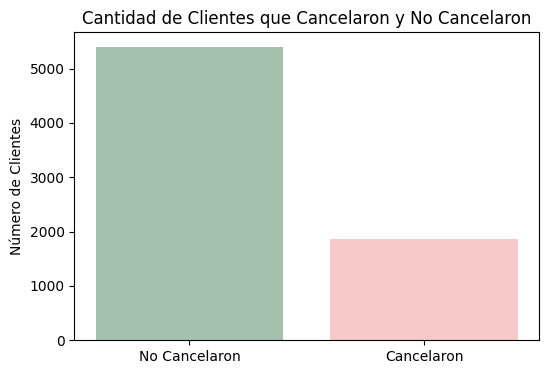

In [ ]:
import matplotlib.pyplot as plt

conteo = datos['Cancelacion'].value_counts()
etiquetas = ['No Cancelaron', 'Cancelaron']
colores_suaves = ['#A3C1AD', '#F7CAC9']  # Verde pastel y rosa pastel

plt.figure(figsize=(6,4))
plt.bar(etiquetas, conteo, color=colores_suaves)
plt.title('Cantidad de Clientes que Cancelaron y No Cancelaron')
plt.ylabel('Número de Clientes')
plt.show()


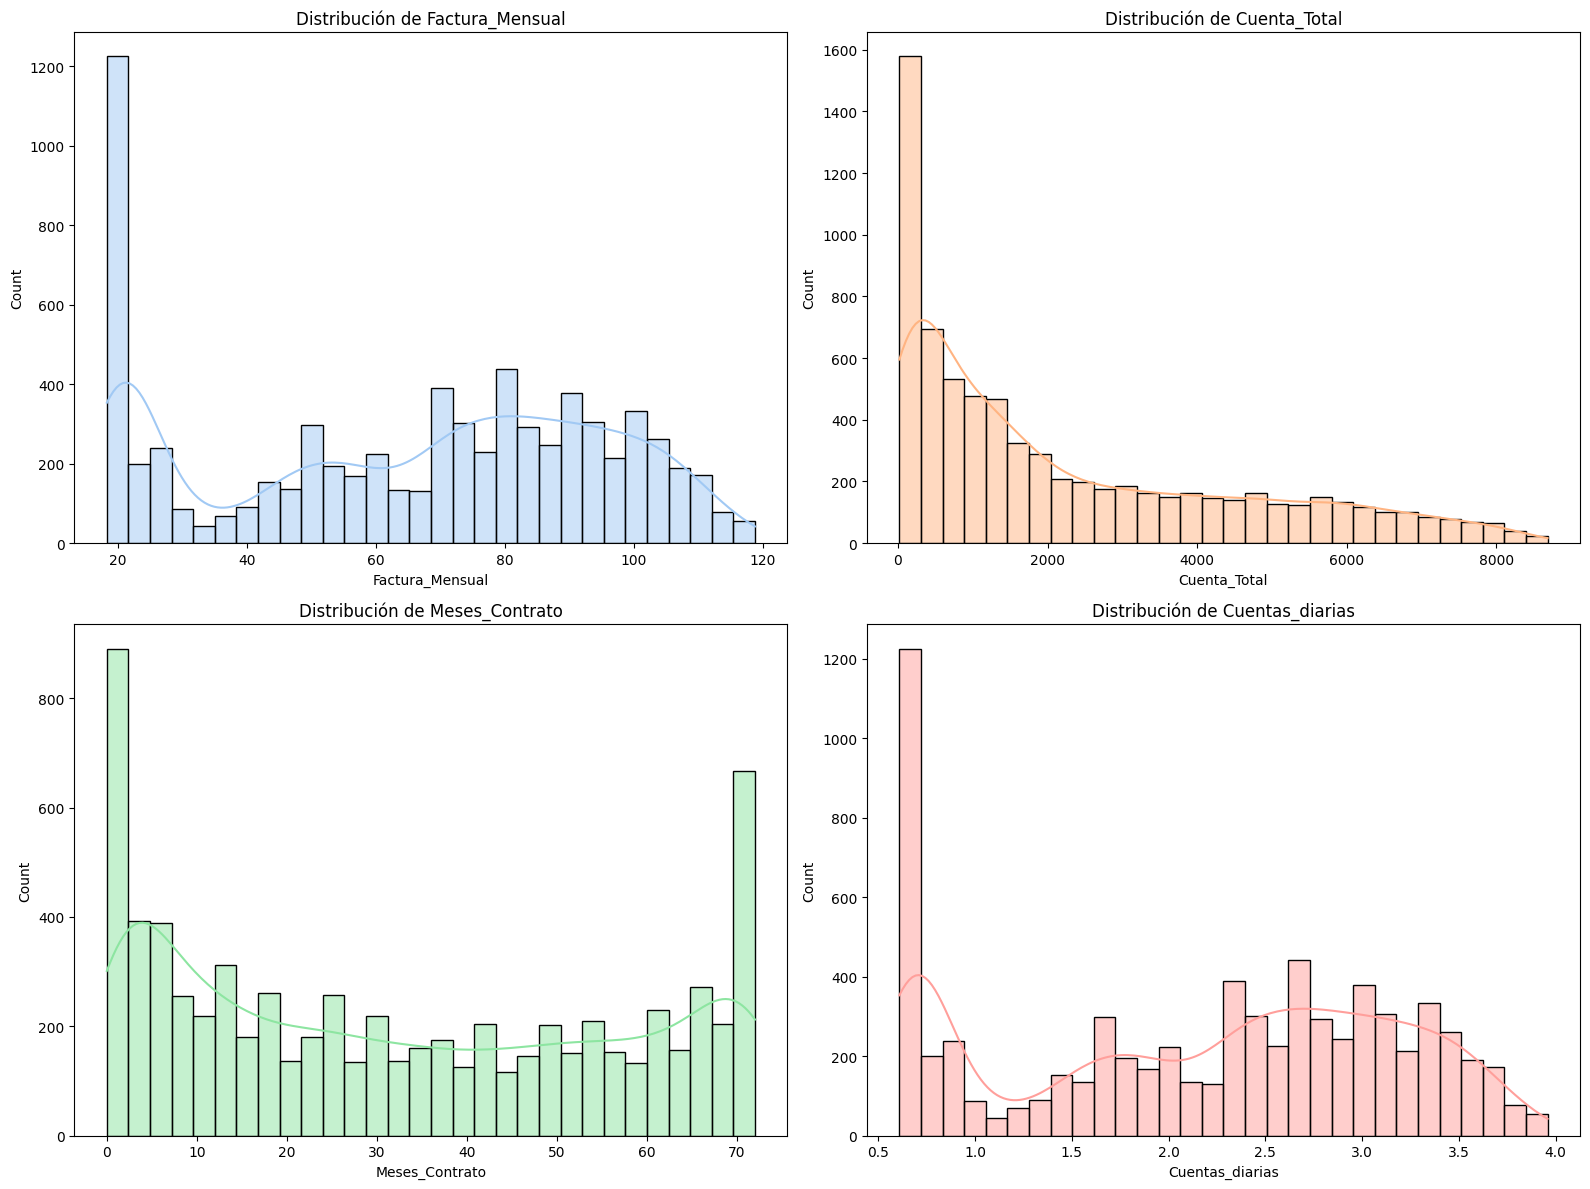

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

cols_num = ['Factura_Mensual', 'Cuenta_Total', 'Meses_Contrato', 'Cuentas_diarias']

# Paleta pastel para 4 colores
colores_pastel = sns.color_palette("pastel", n_colors=4)

plt.figure(figsize=(16, 12))
for i, (col, color) in enumerate(zip(cols_num, colores_pastel), 1):
    plt.subplot(2, 2, i)
    sns.histplot(datos[col], kde=True, color=color, bins=30)
    plt.title(f'Distribución de {col}')
plt.tight_layout()
plt.show()


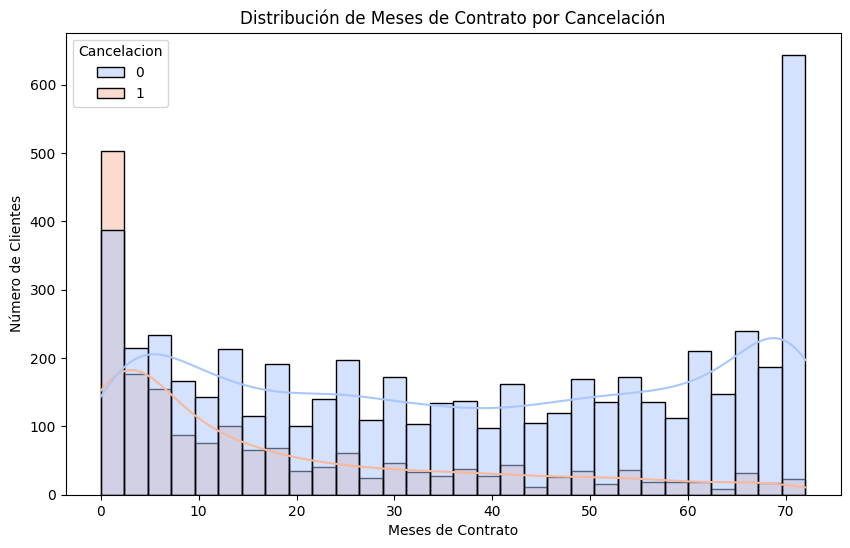

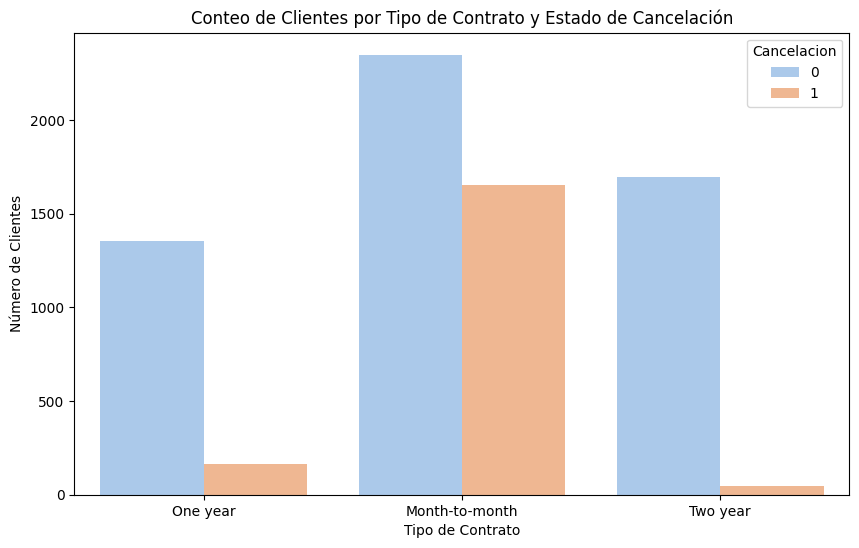

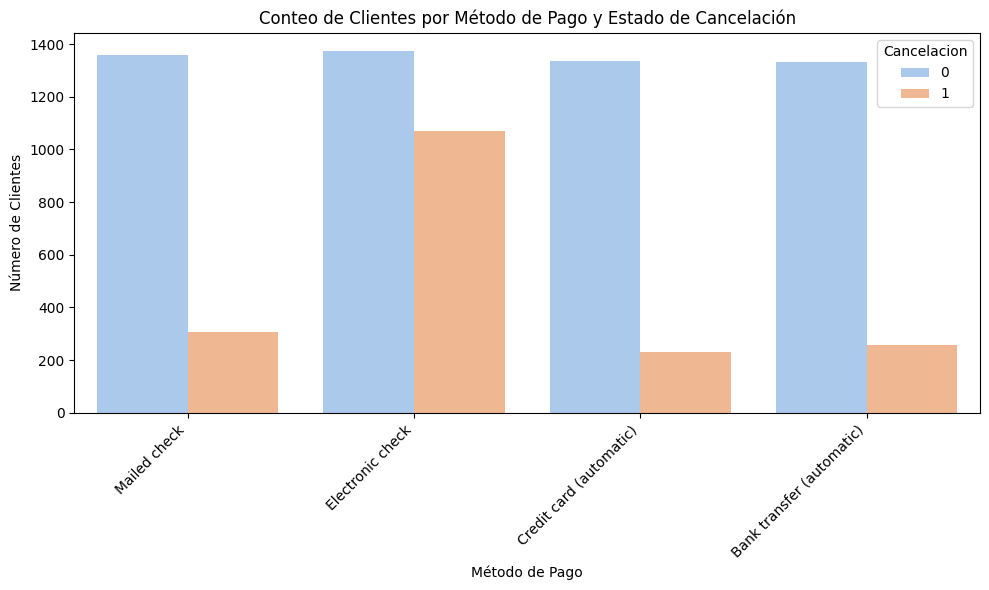

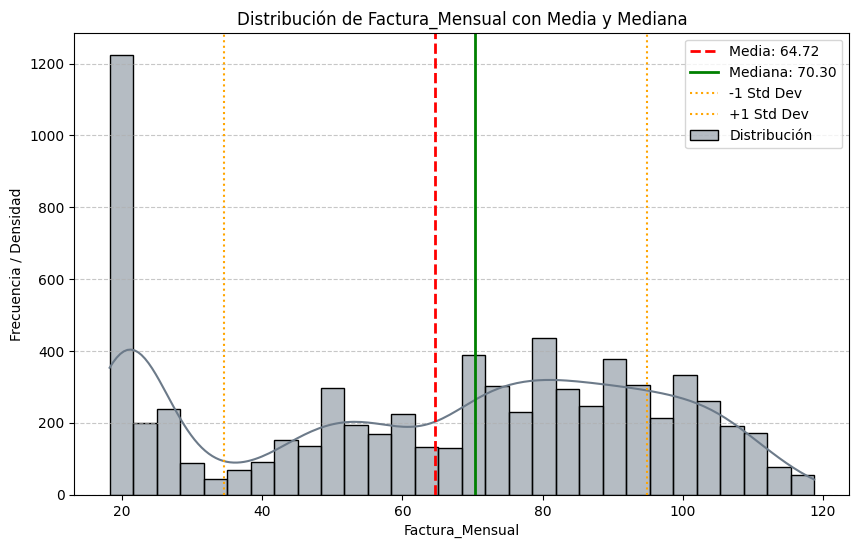

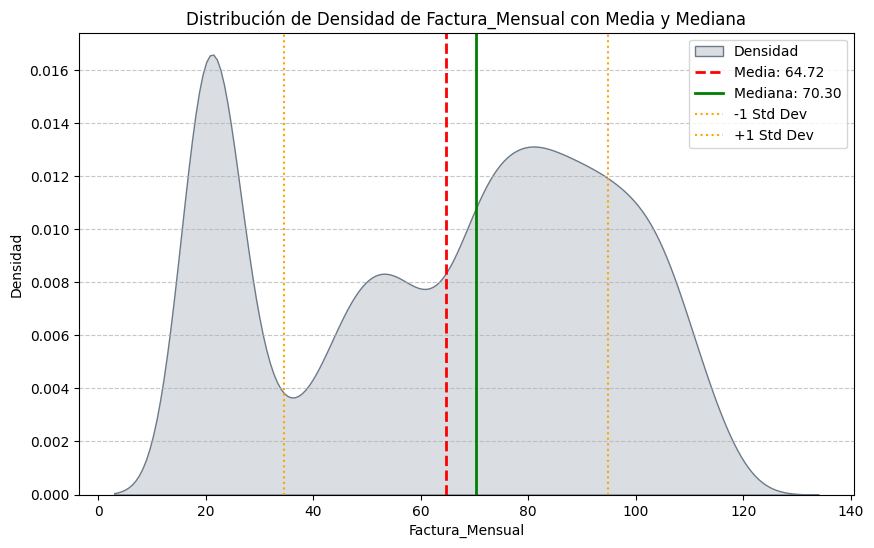

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Histograma de 'Meses_Contrato' por 'Cancelacion' (para ver diferencias)
plt.figure(figsize=(10, 6))
sns.histplot(data=datos, x='Meses_Contrato', hue='Cancelacion', kde=True, palette='coolwarm', bins=30)
plt.title('Distribución de Meses de Contrato por Cancelación')
plt.xlabel('Meses de Contrato')
plt.ylabel('Número de Clientes')
plt.show()

# Gráfico de barras para una variable categórica y su relación con la cancelación
plt.figure(figsize=(10, 6))
sns.countplot(data=datos, x='Tipo_Contrato', hue='Cancelacion', palette='pastel')
plt.title('Conteo de Clientes por Tipo de Contrato y Estado de Cancelación')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Número de Clientes')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(data=datos, x='Metodo_Pago', hue='Cancelacion', palette='pastel')
plt.title('Conteo de Clientes por Método de Pago y Estado de Cancelación')
plt.xlabel('Método de Pago')
plt.ylabel('Número de Clientes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

columna_analizar = 'Factura_Mensual'


# --- Gráfico de Histograma con Líneas de Referencia ---
plt.figure(figsize=(10, 6))
sns.histplot(datos[columna_analizar], kde=True, bins=30, color='#6C7A89', label='Distribución') # Un color neutro
plt.axvline(media, color='red', linestyle='--', linewidth=2, label=f'Media: {media:.2f}')
plt.axvline(mediana, color='green', linestyle='-', linewidth=2, label=f'Mediana: {mediana:.2f}')

# Opcional: Líneas para la desviación estándar (a +/- 1 y +/- 2 DE)
plt.axvline(media - desviacion_estandar, color='orange', linestyle=':', linewidth=1.5, label='-1 Std Dev')
plt.axvline(media + desviacion_estandar, color='orange', linestyle=':', linewidth=1.5, label='+1 Std Dev')
# plt.axvline(media - 2 * desviacion_estandar, color='purple', linestyle=':', linewidth=1, label='-2 Std Dev')
# plt.axvline(media + 2 * desviacion_estandar, color='purple', linestyle=':', linewidth=1, label='+2 Std Dev')


plt.title(f'Distribución de {columna_analizar} con Media y Mediana')
plt.xlabel(columna_analizar)
plt.ylabel('Frecuencia / Densidad')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# --- Gráfico de Densidad (KDE) puro con Líneas de Referencia ---
plt.figure(figsize=(10, 6))
sns.kdeplot(datos[columna_analizar], fill=True, color='#6C7A89', label='Densidad') # Un color neutro
plt.axvline(media, color='red', linestyle='--', linewidth=2, label=f'Media: {media:.2f}')
plt.axvline(mediana, color='green', linestyle='-', linewidth=2, label=f'Mediana: {mediana:.2f}')

# Opcional: Líneas para la desviación estándar
plt.axvline(media - desviacion_estandar, color='orange', linestyle=':', linewidth=1.5, label='-1 Std Dev')
plt.axvline(media + desviacion_estandar, color='orange', linestyle=':', linewidth=1.5, label='+1 Std Dev')

plt.title(f'Distribución de Densidad de {columna_analizar} con Media y Mediana')
plt.xlabel(columna_analizar)
plt.ylabel('Densidad')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()




Métricas para 'Factura_Mensual':
  Media: 64.72
  Mediana: 70.30
  Desviación Estándar: 30.13


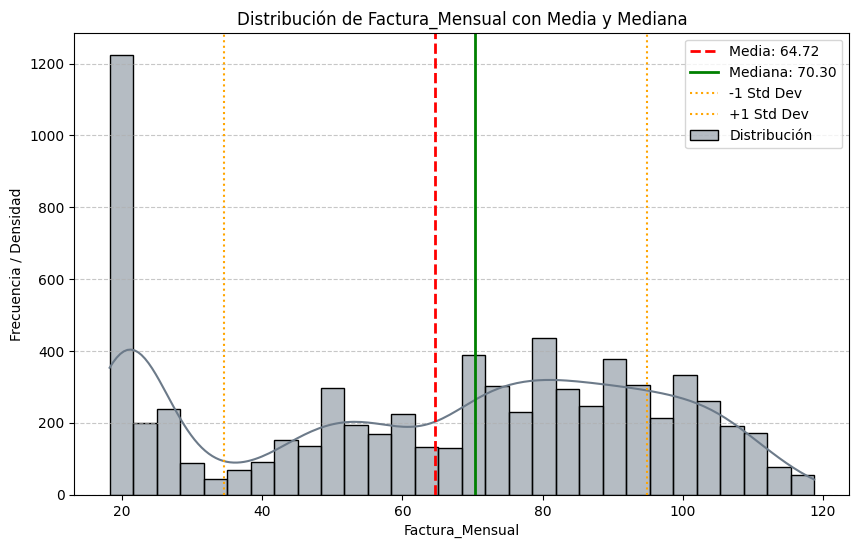

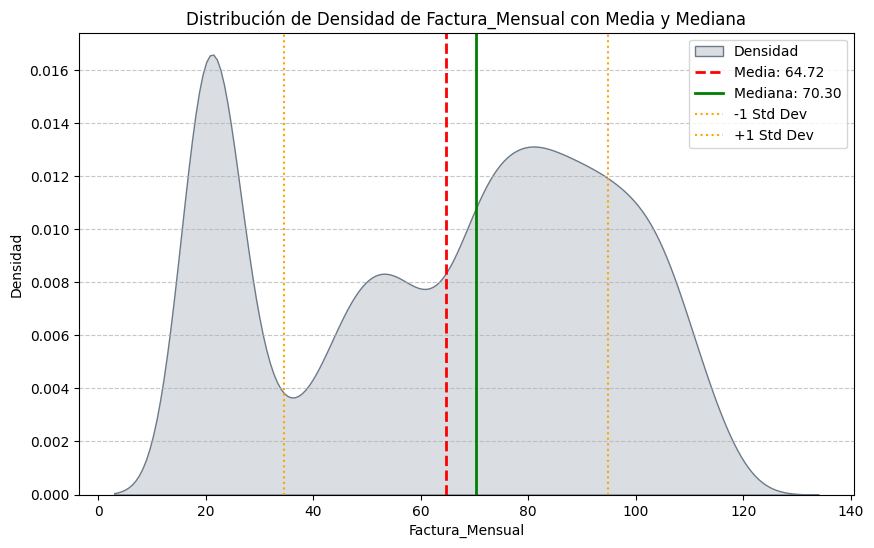

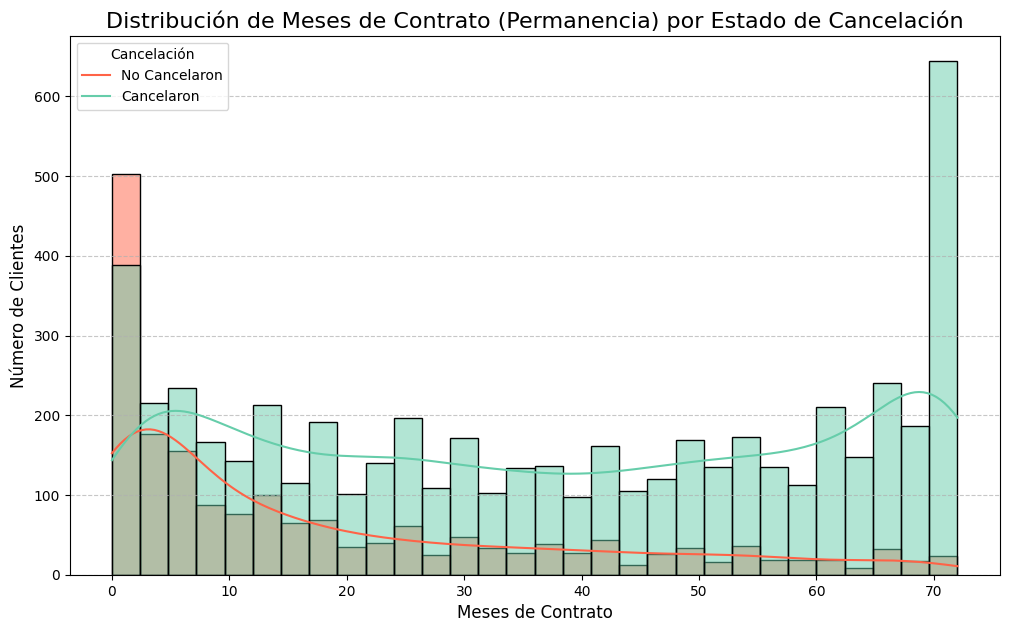

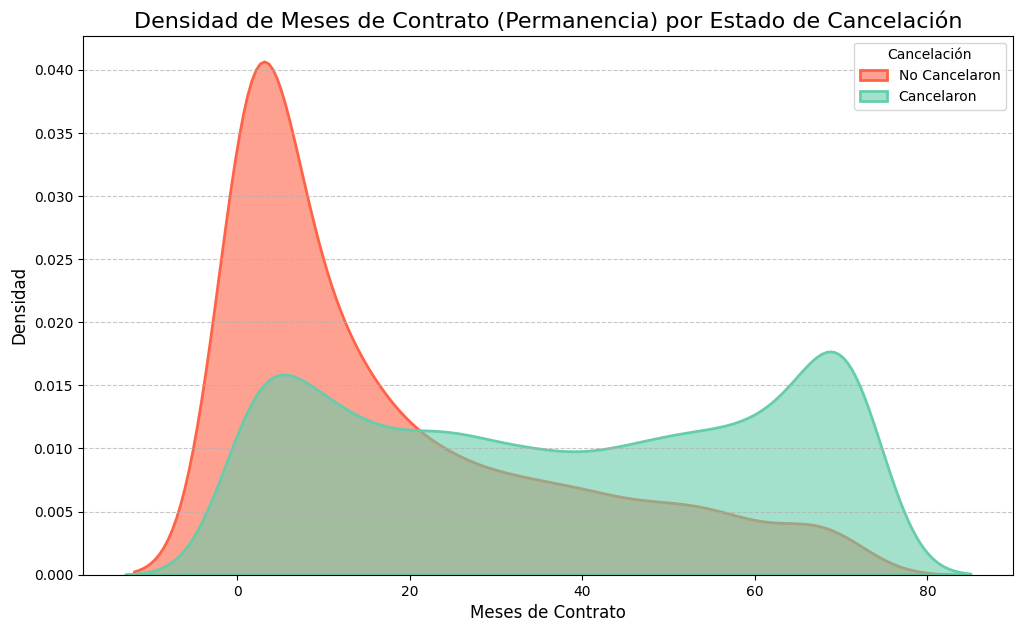

<Figure size 1200x700 with 0 Axes>

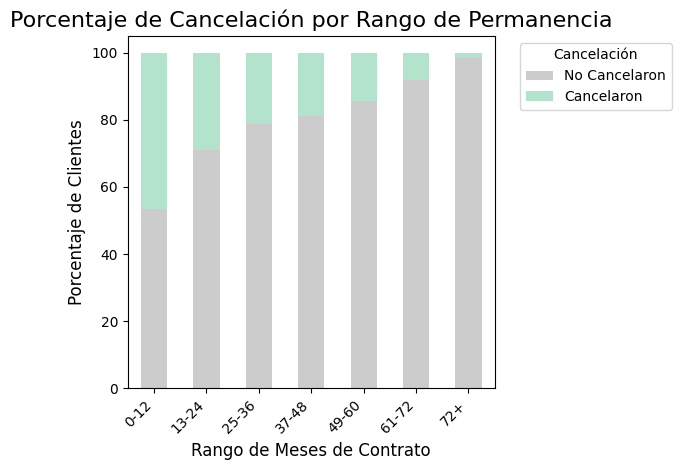

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Suponiendo que 'datos' es tu DataFrame ya procesado
# y las columnas como 'Meses_Contrato' y 'Cancelacion' están listas.

# --- Opción 1: Histograma/KDE de Meses_Contrato por Cancelación (la más informativa) ---
plt.figure(figsize=(12, 7))
sns.histplot(data=datos, x='Meses_Contrato', hue='Cancelacion', kde=True,
             palette={0: '#66CDAA', 1: '#FF6347'}, # Colores para No Cancelaron (verde pastel) y Cancelaron (rojo coral)
             bins=30,  # Puedes ajustar el número de bins
             common_norm=False, # Normaliza cada grupo por separado
             stat="count") # "count" para frecuencia, "density" para densidad
plt.title('Distribución de Meses de Contrato (Permanencia) por Estado de Cancelación', fontsize=16)
plt.xlabel('Meses de Contrato', fontsize=12)
plt.ylabel('Número de Clientes', fontsize=12)
plt.legend(title='Cancelación', labels=['No Cancelaron', 'Cancelaron'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# --- Opción 2: Gráfico de Densidad (KDE) puro para Permanencia y Cancelación ---
# Esto es similar al anterior pero solo muestra la curva de densidad, ideal para la forma de la distribución
plt.figure(figsize=(12, 7))
sns.kdeplot(data=datos, x='Meses_Contrato', hue='Cancelacion', fill=True,
            palette={0: '#66CDAA', 1: '#FF6347'},
            common_norm=False, # Normaliza cada curva de densidad independientemente
            linewidth=2,
            alpha=0.6)
plt.title('Densidad de Meses de Contrato (Permanencia) por Estado de Cancelación', fontsize=16)
plt.xlabel('Meses de Contrato', fontsize=12)
plt.ylabel('Densidad', fontsize=12)
plt.legend(title='Cancelación', labels=['No Cancelaron', 'Cancelaron'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# --- Opción 3: Gráfico de Barras Apiladas (discretizando Meses_Contrato) ---
# Esta opción es útil si prefieres ver las proporciones de cancelación en rangos de permanencia.
# Primero, vamos a crear "rangos de permanencia"
bins = [0, 12, 24, 36, 48, 60, 72, np.inf]
labels = ['0-12', '13-24', '25-36', '37-48', '49-60', '61-72', '72+']
datos['Rango_Permanencia'] = pd.cut(datos['Meses_Contrato'], bins=bins, labels=labels, right=False)

# Crear una tabla de contingencia
contingency_table = pd.crosstab(datos['Rango_Permanencia'], datos['Cancelacion'], normalize='index') * 100

# Graficar
plt.figure(figsize=(12, 7))
contingency_table.plot(kind='bar', stacked=True, colormap='Pastel2_r') # Pastel2_r para invertir los colores y que 'no cancelaron' sea más claro
plt.title('Porcentaje de Cancelación por Rango de Permanencia', fontsize=16)
plt.xlabel('Rango de Meses de Contrato', fontsize=12)
plt.ylabel('Porcentaje de Clientes', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Cancelación', labels=['No Cancelaron', 'Cancelaron'], bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

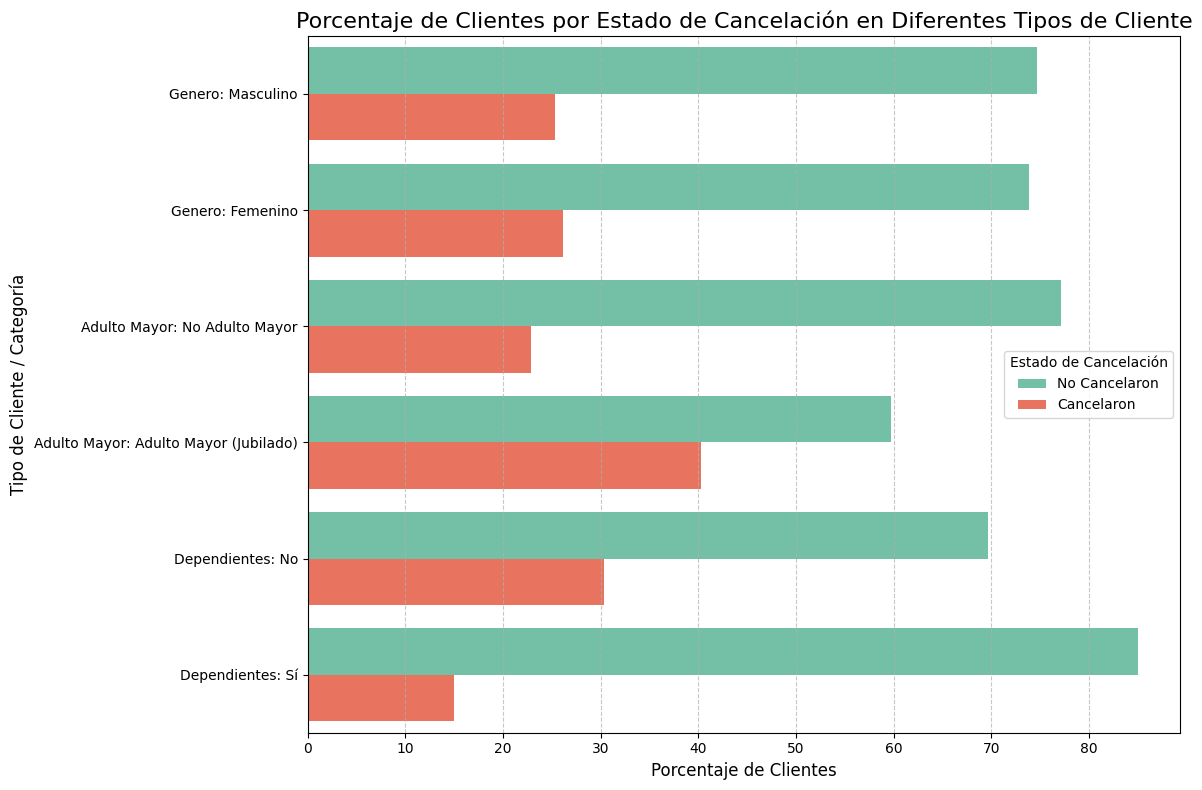

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Suponiendo que 'datos' es tu DataFrame ya procesado
# Asegúrate de que las columnas 'Genero', 'Adulto_Mayor', 'Tiene_Dependientes'
# estén en el formato numérico (0/1) después de tus pasos de transformación anteriores.

# Columnas específicas para el análisis
columnas_clientes = [
    'Genero',
    'Adulto_Mayor',
    'Tiene_Dependientes'
]

# Diccionarios para mapear los valores numéricos a etiquetas más descriptivas
mapeo_Genero = {0: 'Masculino', 1: 'Femenino'}
mapeo_Adulto_Mayor = {0: 'No Adulto Mayor', 1: 'Adulto Mayor (Jubilado)'}
mapeo_Binario = {0: 'No', 1: 'Sí'}

# CORRECCIÓN AQUÍ: Actualiza las claves del diccionario de colores
colores_cancelacion = {'No Cancelaron': '#66CDAA', 'Cancelaron': '#FF6347'} # Ahora con las etiquetas de texto

# --- Preparar los datos para el gráfico combinado ---
all_churn_percentages = []

for col in columnas_clientes:
    # Calcular los porcentajes
    churn_by_type = datos.groupby([col, 'Cancelacion']).size().unstack(fill_value=0)
    churn_by_type_percentage = churn_by_type.apply(lambda x: x / x.sum() * 100, axis=1).reset_index()

    # Renombrar columnas para facilitar el 'melt' y la visualización
    churn_by_type_percentage.columns = [col, 'No Cancelaron_Perc', 'Cancelaron_Perc']

    # Aplicar los mapeos de etiquetas
    if col == 'Genero':
        churn_by_type_percentage[col] = churn_by_type_percentage[col].map(mapeo_Genero)
    elif col == 'Adulto_Mayor':
        churn_by_type_percentage[col] = churn_by_type_percentage[col].map(mapeo_Adulto_Mayor)
    elif col == 'Tiene_Dependientes':
        churn_by_type_percentage[col] = churn_by_type_percentage[col].map(mapeo_Binario)

    # Crear una columna combinada para las etiquetas del eje Y
    churn_by_type_percentage['Tipo de Cliente'] = col.replace('_', ' ').replace('Tiene ', '') + ': ' + churn_by_type_percentage[col].astype(str)

    # Añadir al listado
    all_churn_percentages.append(churn_by_type_percentage)

# Concatenar todos los DataFrames
final_df = pd.concat(all_churn_percentages, ignore_index=True)

# Reestructurar el DataFrame para Seaborn (formato "largo")
# Queremos una columna para el porcentaje y otra para el estado de cancelación
df_melted = final_df.melt(id_vars=['Tipo de Cliente'],
                           value_vars=['No Cancelaron_Perc', 'Cancelaron_Perc'],
                           var_name='Estado_Cancelacion',
                           value_name='Porcentaje')

# Renombrar las etiquetas del estado de cancelación para la leyenda
df_melted['Estado_Cancelacion'] = df_melted['Estado_Cancelacion'].replace({
    'No Cancelaron_Perc': 'No Cancelaron',
    'Cancelaron_Perc': 'Cancelaron'
})

# Ordenar para una mejor visualización (puedes ajustar el orden si quieres)
# Por ejemplo, puedes ordenar por la tasa de cancelación para ver los grupos más propensos
df_melted['Order'] = df_melted['Tipo de Cliente'].apply(lambda x: x.split(': ')[1])
order_map = {
    'Masculino': 0, 'Femenino': 1,
    'No Adulto Mayor': 2, 'Adulto Mayor (Jubilado)': 3,
    'No': 4, 'Sí': 5
}
df_melted = df_melted.sort_values(by='Order', key=lambda x: x.map(order_map), ascending=True)


# --- Gráfico de Barras Apiladas Horizontal Único ---
plt.figure(figsize=(12, 8))
sns.barplot(
    data=df_melted,
    x='Porcentaje',
    y='Tipo de Cliente',
    hue='Estado_Cancelacion',
    palette=colores_cancelacion, # ¡Ahora esto funcionará!
    orient='h', # Esto lo hace horizontal
    order=df_melted['Tipo de Cliente'].unique() # Asegura el orden correcto en el eje Y
)

plt.title('Porcentaje de Clientes por Estado de Cancelación en Diferentes Tipos de Cliente', fontsize=16)
plt.xlabel('Porcentaje de Clientes', fontsize=12)
plt.ylabel('Tipo de Cliente / Categoría', fontsize=12)
plt.legend(title='Estado de Cancelación')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

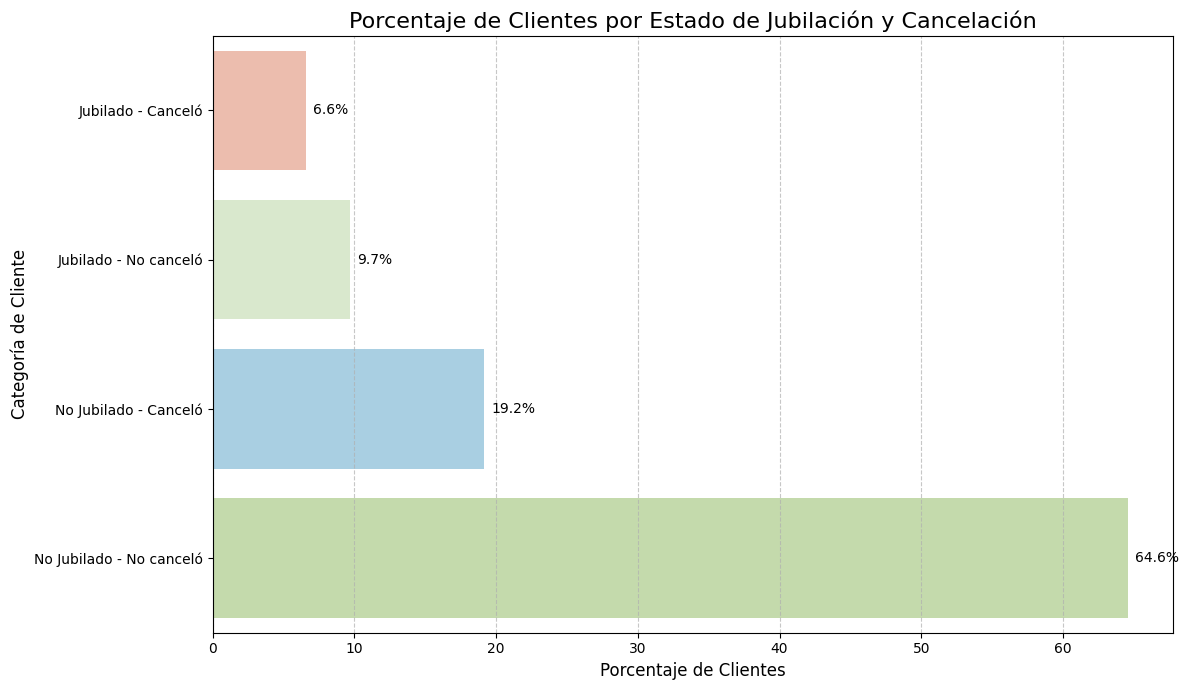

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Suponiendo que 'datos' es tu DataFrame ya procesado
# Asegúrate de que las columnas 'Adulto_Mayor' y 'Cancelacion' estén en formato 0/1.

# Mapeos para las etiquetas finales
mapeo_Adulto_Mayor = {0: 'No Jubilado', 1: 'Jubilado'}
mapeo_Cancelacion = {0: 'No canceló', 1: 'Canceló'}

# Paleta de tonos pasteles
# Puedes ajustar estos colores, aquí hay una opción de Seaborn 'pastel' o definir los tuyos.
# sns.color_palette("pastel")
colores_pastel_manual = {
    'Jubilado - Canceló': '#F7B7A3',        # Un naranja/coral pastel
    'Jubilado - No canceló': '#D9EDC8',     # Un verde suave pastel
    'No Jubilado - Canceló': '#A0D2EB',     # Un azul claro pastel
    'No Jubilado - No canceló': '#C5E1A5'   # Otro verde claro pastel
}

# --- Crear la columna combinada ---
datos['Jubilacion_Cancelacion_Combinada'] = datos['Adulto_Mayor'].map(mapeo_Adulto_Mayor) + ' - ' + \
                                             datos['Cancelacion'].map(mapeo_Cancelacion)

# Calcular los porcentajes
# Esto calculará el porcentaje de cada categoría combinada sobre el total de clientes
conteo_combinado = datos['Jubilacion_Cancelacion_Combinada'].value_counts(normalize=True).reset_index()
conteo_combinado.columns = ['Categoria', 'Porcentaje']
conteo_combinado['Porcentaje'] = conteo_combinado['Porcentaje'] * 100 # Convertir a porcentaje

# Opcional: Reordenar las categorías para que aparezcan en un orden específico en el gráfico
# Mantenemos el orden que solicitaste para la visualización
orden_categorias = [
    'Jubilado - Canceló',
    'Jubilado - No canceló',
    'No Jubilado - Canceló',
    'No Jubilado - No canceló'
]
# Asegurarse de que el DataFrame de conteo_combinado también esté ordenado
conteo_combinado['Categoria'] = pd.Categorical(conteo_combinado['Categoria'], categories=orden_categorias, ordered=True)
conteo_combinado = conteo_combinado.sort_values('Categoria')


# --- Generar el gráfico de barras horizontal con porcentajes ---
plt.figure(figsize=(12, 7)) # Aumentamos el tamaño para que las etiquetas quepan bien
ax = sns.barplot(
    data=conteo_combinado,
    x='Porcentaje',
    y='Categoria',
    palette=colores_pastel_manual, # Usar la paleta pastel definida
    order=orden_categorias         # Asegurar el orden deseado
)

plt.title('Porcentaje de Clientes por Estado de Jubilación y Cancelación', fontsize=16)
plt.xlabel('Porcentaje de Clientes', fontsize=12)
plt.ylabel('Categoría de Cliente', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# --- Añadir etiquetas de texto con los porcentajes en las barras (los "peaks") ---
for p in ax.patches:
    width = p.get_width()    # Ancho de la barra (el valor del porcentaje)
    y = p.get_y() + p.get_height() / 2 # Posición central vertical de la barra
    ax.annotate(f'{width:.1f}%', # Formato del texto (un decimal y el signo %)
                (width, y),      # Posición (al final de la barra)
                ha='left',       # Alineación horizontal a la izquierda
                va='center',     # Alineación vertical al centro
                xytext=(5, 0),   # Offset para separar el texto de la barra
                textcoords='offset points',
                fontsize=10,
                color='black')

plt.tight_layout()
plt.show()

Análisis de Distribución de Total Gastado y Tiempo de Contrato por Estado de Cancelación:

--- Depuración de la columna 'Cancelacion' ---
Tipo de datos de 'Cancelacion': object
Valores únicos en 'Cancelacion': ['0' '1']
Conteo de valores en 'Cancelacion':
Cancelacion
0    5398
1    1869
Name: count, dtype: int64
--- Fin de Depuración ---



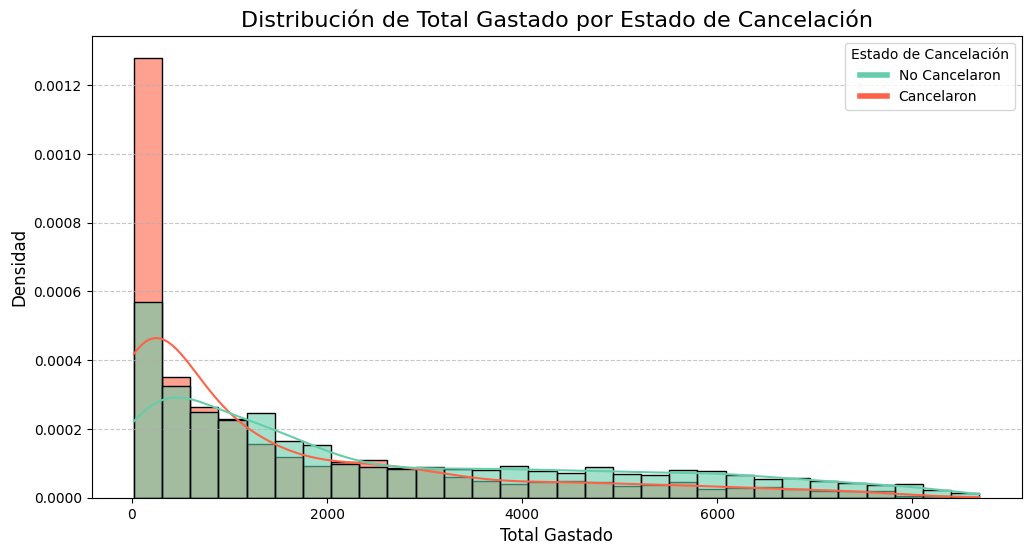

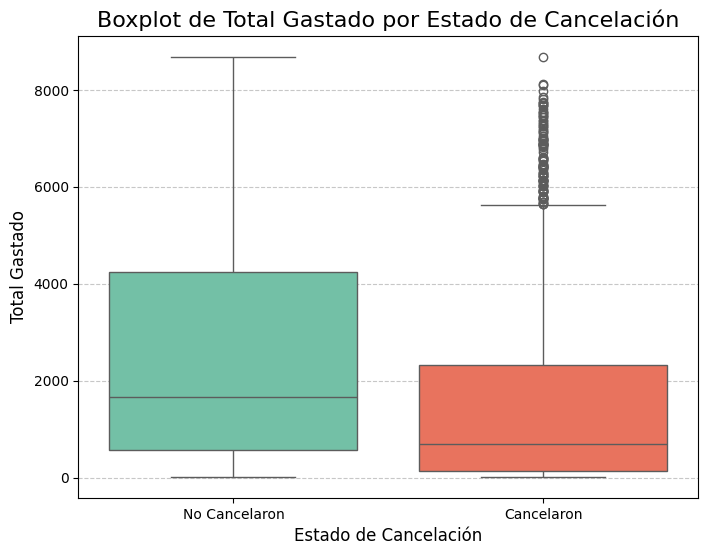

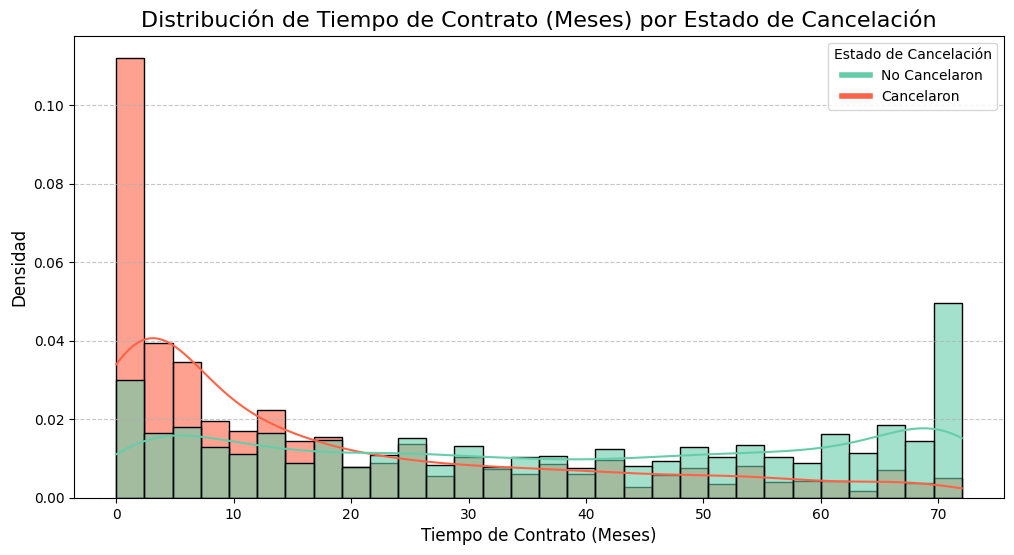

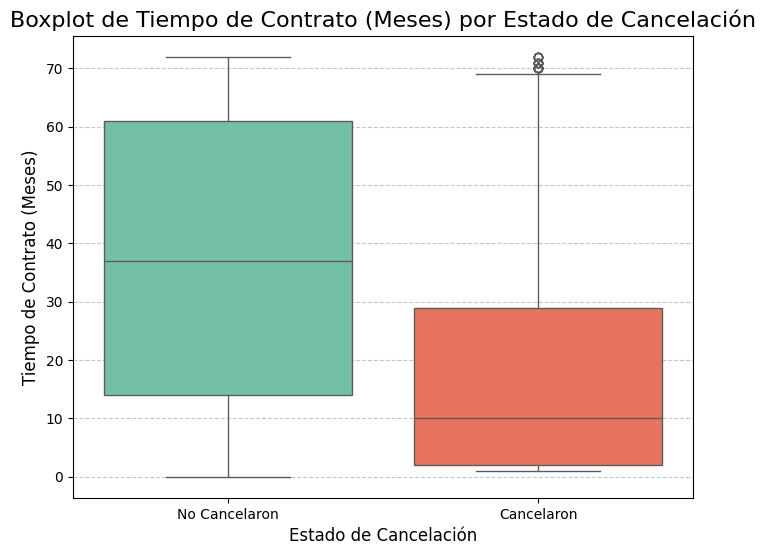

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Suponiendo que 'datos' es tu DataFrame ya procesado
# Asegúrate de que 'Cuenta_Total', 'Meses_Contrato' y 'Cancelacion' estén en el formato correcto.

# Columnas numéricas a analizar
columnas_numericas_distribucion = ['Cuenta_Total', 'Meses_Contrato']

# CORRECCIÓN: Asegura que las claves de la paleta sean las CADENAS '0' y '1'.
colores_cancelacion = {'0': '#66CDAA', '1': '#FF6347'} # No Cancelaron (verde), Cancelaron (rojo)

# Etiquetas para la leyenda
etiquetas_cancelacion = {0: 'No Cancelaron', 1: 'Cancelaron'}


print("Análisis de Distribución de Total Gastado y Tiempo de Contrato por Estado de Cancelación:")

# --- INICIO DE DEPURACIÓN ---
print("\n--- Depuración de la columna 'Cancelacion' ---")
print(f"Tipo de datos de 'Cancelacion': {datos['Cancelacion'].dtype}")
print(f"Valores únicos en 'Cancelacion': {datos['Cancelacion'].unique()}")
print(f"Conteo de valores en 'Cancelacion':\n{datos['Cancelacion'].value_counts(dropna=False)}")
print("--- Fin de Depuración ---\n")

# Corrección de tipo de dato: Asegurar que 'Cancelacion' sea de tipo string '0' o '1'
# Si 'Cancelacion' es numérica (int/float), la convertiremos a string para que coincida con las claves de la paleta.
# Esto es una medida de seguridad si el tipo de dato no es consistente.
if datos['Cancelacion'].dtype != object: # Si no es de tipo 'object' (string)
    datos['Cancelacion'] = datos['Cancelacion'].astype(str)
    print(f"Tipo de datos de 'Cancelacion' después de la conversión: {datos['Cancelacion'].dtype}")
    print(f"Valores únicos en 'Cancelacion' después de la conversión: {datos['Cancelacion'].unique()}")


for col in columnas_numericas_distribucion:
    plt.figure(figsize=(12, 6))

    # --- Histograma con KDE para comparar distribuciones ---
    sns.histplot(
        data=datos,
        x=col,
        hue='Cancelacion', # Aquí se usa la columna que ahora sabemos que es de tipo string '0' o '1'
        kde=True,
        palette=colores_cancelacion, # Las claves de la paleta coinciden con las cadenas '0' y '1'
        bins=30,
        common_norm=False,
        stat="density",
        alpha=0.6
    )

    # Añadir título y etiquetas
    titulo_col = col.replace("_", " ").replace("Cuenta Total", "Total Gastado").replace("Meses Contrato", "Tiempo de Contrato (Meses)")
    plt.title(f'Distribución de {titulo_col} por Estado de Cancelación', fontsize=16)
    plt.xlabel(titulo_col, fontsize=12)
    plt.ylabel('Densidad', fontsize=12)

    # Recrear la leyenda usando las etiquetas de texto
    handles = [plt.Line2D([0], [0], color=colores_cancelacion['0'], lw=4),
               plt.Line2D([0], [0], color=colores_cancelacion['1'], lw=4)]
    plt.legend(handles=handles, labels=[etiquetas_cancelacion[0], etiquetas_cancelacion[1]], title='Estado de Cancelación')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

    # --- Boxplot para ver medianas, cuartiles y outliers ---
    plt.figure(figsize=(8, 6))
    sns.boxplot(
        data=datos,
        x='Cancelacion', # Aquí se usa la columna que ahora sabemos que es de tipo string '0' o '1'
        y=col,
        palette=colores_cancelacion # Paleta corregida
    )
    plt.title(f'Boxplot de {titulo_col} por Estado de Cancelación', fontsize=16)
    plt.xlabel('Estado de Cancelación', fontsize=12)
    plt.ylabel(titulo_col, fontsize=12)
    plt.xticks(ticks=[0, 1], labels=[etiquetas_cancelacion[0], etiquetas_cancelacion[1]])
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()